In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def generate_data(nx, qtde):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []
    
    for _ in range(qtde // 2):
        # random coefficients for polynomials
        a = 2 * np.random.randn()
        b = 2 * np.random.randn()

        # generate polynomials and their derivatives
        #coeffs = np.random.randn(p + 1)
        polinomio1 = ( x**2 - a**2)*(x**2 - b**2)
        polinomio2 = x**5 + a*x**3 - (b**2)*x**3 - (a*b**2)*x
        noise = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        y.append(polinomio1 / np.max(np.abs(polinomio1)) + noise)
        y.append(polinomio2 / np.max(np.abs(polinomio2)) + noise)
        
        # derivates
        noise = 0.1 * np.random.randn(len(x)).reshape(-1, 1)
        derivada1 = 2*x*(2*x**2 - (a**2 + b**2 ))
        derivada2 = 5*x**4 + 3*a*x**2 - 3*(b**2)*x**2 - a*(b**2)
        dy.append(derivada1/np.max(np.abs(derivada1)))
        dy.append(derivada2/np.max(np.abs(derivada2)))
    

    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# generate data
y, dy = generate_data(20, 10000)

print(y.shape)
print(dy.shape)

(10000, 20)
(10000, 20)


In [ ]:
# separate data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10
layers = 10

# define model
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=100000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.01,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)

# training
model.fit(X_train, y_train)

# test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Iteration 1, loss = 0.16307769
Iteration 2, loss = 0.07218427
Iteration 3, loss = 0.03110922
Iteration 4, loss = 0.01834323
Iteration 5, loss = 0.01484547
Iteration 6, loss = 0.01102921
Iteration 7, loss = 0.00929653
Iteration 8, loss = 0.00816740
Iteration 9, loss = 0.00721696
Iteration 10, loss = 0.00652302
Iteration 11, loss = 0.00614411
Iteration 12, loss = 0.00573734
Iteration 13, loss = 0.00522953
Iteration 14, loss = 0.00497736
Iteration 15, loss = 0.00516060
Iteration 16, loss = 0.00468717
Iteration 17, loss = 0.00437228
Iteration 18, loss = 0.00441171
Iteration 19, loss = 0.00403791
Iteration 20, loss = 0.00420760
Iteration 21, loss = 0.00412390
Iteration 22, loss = 0.00404111
Iteration 23, loss = 0.00390638
Iteration 24, loss = 0.00395132
Iteration 25, loss = 0.00377027
Iteration 26, loss = 0.00384060
Iteration 27, loss = 0.00431490
Iteration 28, loss = 0.00364531
Iteration 29, loss = 0.00400714
Iteration 30, loss = 0.00382740
Iteration 31, loss = 0.00387428
Iteration 32, los

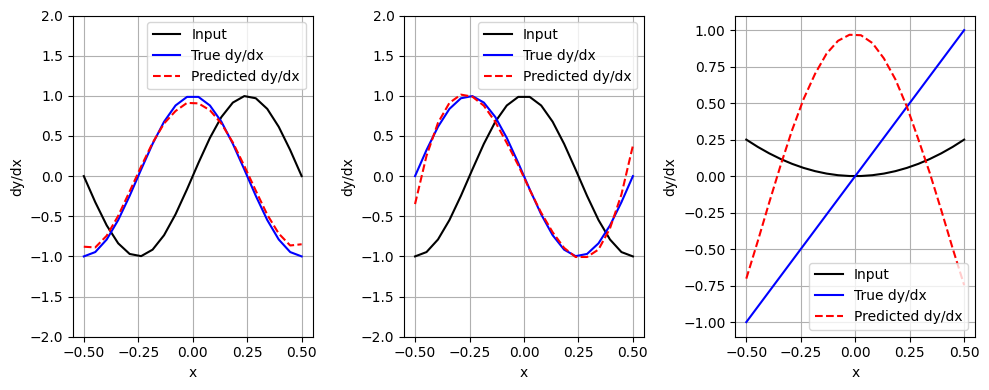

In [4]:
plt.figure(figsize=(10, 4))

new_x = np.linspace(-1/2, 1/2, y.shape[1]).reshape(1,-1)

# test 1
plt.subplot(131)
new_y = np.sin(2*np.pi*new_x)
new_dy = np.cos(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 2
plt.subplot(132)
new_y = np.cos(2*np.pi*new_x)
new_dy = -np.sin(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 3
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()